# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [1]:
%matplotlib inline
#Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
biketrip_data_to_load = "Resources/BikeTrippin.csv"


In [3]:
# Read the city data file and store it in a pandas DataFrame.
bike_trips_df = pd.read_csv(biketrip_data_to_load, low_memory=False)
bike_trips_df.head(10)

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971
5,10/13/2014 10:47,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1974
6,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978
7,10/13/2014 11:45,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1983
8,10/13/2014 11:45,SEA00486,586.347,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Female,1974
9,10/13/2014 11:45,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1958


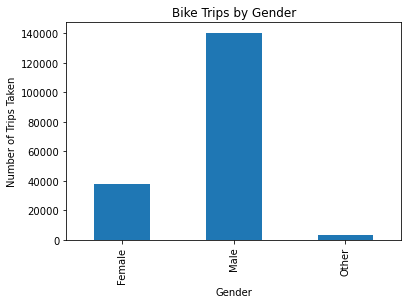

<Figure size 432x288 with 0 Axes>

In [4]:
# Split up our data into groups based upon 'gender'
gender_groups = bike_trips_df.groupby('gender')

# Find out how many of each gender took bike trips
gender_trips = gender_groups['tripduration'].count()

# Drop the 'stoptime' row that is contained within our group
gender_trips = gender_trips.drop(gender_trips.index[3])

# Chart our data, give it a title, and label the axes
gender_chart = gender_trips.plot(kind="bar", title="Bike Trips by Gender")
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Number of Trips Taken")

plt.show()
plt.tight_layout()

In [5]:
# Split up our data into groups based upon 'bikeid' and 'gender'
bike_groups = bike_trips_df.groupby(['bikeid','gender'])

# Create a new variable that holds the sum of our groups
sum_it_up = bike_groups.sum()
sum_it_up.head(12)

tripduration
bikeid   gender              
SEA00001 Female     15876.665
         Male       41150.373
         Other        276.880
SEA00005 Female     20616.240
         Male       60386.328
         Other       1784.955
SEA00006 Female     20071.004
         Male       46584.453
         Other       1469.839
SEA00007 Female      9996.402
         Male       16618.213
         Other       1040.571

In [6]:
# Make a variable called bike_id and store a 'bikeid' in it
bike_id = "SEA00001"

# Collect the trips of the 'bikeid' above
just_one_bike = sum_it_up.loc[bike_id]

# Place the gender keys for that single bike into a list
gender_list = just_one_bike.keys()

# Create a pie chart based upon the trip duration of that single bike
bike_pie = just_one_bike.plot(kind="pie", y=gender_list, title=("Trips of " + bike_id))
bike_pie.set_ylabel("Trip Duration")

plt.show()
plt.tight_layout()
plt.axis("equal")

TypeError: Index.name must be a hashable type

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each bike. For this part of the activity, we want you to chart the total 'Trip Duration' of each bike, sorted by gender. Bonus points if you can come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.